# Extracción de datos

# 1. Link web API:

 **https://www.weatherbit.io/api?utm_source=chatgpt.com**

# 2. Normas generales. 
 - Todos los parámetros que pongamos en la llamada a la **API (URL)** van separados por **'&'**. **"lat=35.7796&lon=-78.6382&key=API_KEY&include=minutely"**

 - Todos los links ACABAN con **key=API_KEY**

 - El idioma por defecto de las respuestas será en **Inglés**

        - Se pueden cambiar a Español ocn este parametro: &lang=es
        

 - **Todos** los datos obtenidos por defecto serán:


        - Metric : Celsius, m/s, l/m²


   
# 3. Utilidades del API:

## 3.1 Geocodificación:
   1. Con **zip**: https://api.weatherbit.io/v2.0/geocode?postal_code=08188&country=US&key=API_KEY

           - Muestra un dict{} (No siempre exacto con la ciudad):

           {'country_code': 'ES',
            'geo_id': '08188-ES',
            'lat': 41.5333,
            'lon': 2.3,
            'name': 'Barcelona',
            'state_code': 'CT',
            'timezone': 'Europe/Madrid'}

   
   
   2. Con **nombre de ciudad**: https://api.weatherbit.io/v2.0/geocode?&city=vallromanes&country=ES&key=9a25028e04c943f5b50689bfd5db49b7

           - Muestra un dict{} (Siempre exacto con la ciudad):
   
           {'country_code': 'ES',
            'geo_id': 'VALLROMANES--ES',
            'lat': 41.53333,
            'lon': 2.3,
            'name': 'Vallromanes',
            'state_code': '56',
            'timezone': 'Europe/Madrid'}

             - Mejor con el nombre de la ciudad/pueblo para que sea más preciso.

 - Creo que estos són los métodos más sencillos, las otras dos són con el id de la ciudad (Que no he sabido encontrar) y con la estación meteorológica (Que no se encontrar exactamente qué es lo que pide)
        
           

# 4. Histórico de climas.


## 4.1 Diario:
 - URL: https://api.weatherbit.io/v2.0/history/daily?lat=41.5333&lon=2.2667&start_date=2025-11-08&end_date=2025-11-10&key=9a25028e04c943f5b50689bfd5db49b7
   
   1. lat=41.5333
  
   2. lon=2.2667
  
   3. start_date=2025-11-08                     Formato Datetime: %Y-%m-%d
  
   4. end_date=2025-11-10                       Formato Datetime: %Y-%m-%d

## 4.2 Por horas:
 - URL: https://api.weatherbit.io/v2.0/history/hourly?lat=41.5333&lon=2.2667&start_date=2025-11-08:20&end_date=2025-11-10:20&tz=local&key=9a25028e04c943f5b50689bfd5db49b7
   
   1. lat=41.5333
  
   2. lon=2.2667
  
   3. start_date=2025-11-08 / 2025-11-08:20    Formato Datetime: %Y-%m-%d:%H
  
   4. end_date=2025-11-10 / 2025-11-10:20      Formato Datetime: %Y-%m-%d:%H

## 4.3 Por sub-horas (ej. 15 min):
 - URL: https://api.weatherbit.io/v2.0/history/subhourly?lat=41.5333&lon=2.2667&start_date=2025-11-08:20&end_date=2025-11-10:20&tz=local&key=9a25028e04c943f5b50689bfd5db49b7
   
   1. lat=41.5333
  
   2. lon=2.2667
  
   3. start_date=2025-11-08 / 2025-11-08:20    Formato Datetime: %Y-%m-%d:%H
  
   4. end_date=2025-11-10 / 2025-11-10:20      Formato Datetime: %Y-%m-%d:%H

In [3]:
import requests
from pprint import pprint
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [4]:
# Geocodificación
# Usamos el nombre de la ciudad/pueblo

data = {}

url = "https://api.weatherbit.io/v2.0/geocode?&city=palma+del+rio&country=ES&key=ac89c8c428e94ce68180c1a3a65dec3f"
response = requests.get(url)
data.update(response.json())

pprint(data)

{'country_code': 'ES',
 'geo_id': 'PALMA DEL RIO--ES',
 'lat': 37.70024,
 'lon': -5.28121,
 'name': 'Palma del Rio',
 'state_code': '51',
 'timezone': 'Europe/Madrid'}


In [5]:
# Registro histórico de clima (diario)

data = {}
url = "https://api.weatherbit.io/v2.0/history/daily?lat=41.63333&lon=2.16667&start_date=2025-11-08&end_date=2025-11-10&key=ac89c8c428e94ce68180c1a3a65dec3f"
response = requests.get(url)
data.update(response.json())

# pprint(data)

for x in data["data"]:
    print(f"{data["city_name"]}")
    print(f"A fecha de: {x["datetime"]} temperatura media: {x["temp"]} Temperatura máxima: {x["max_temp"]} Temperatura máxima: {x["min_temp"]}")
    print(f"Humedad: {x["rh"]}%")
    print(f"Precipitaciones: {x["precip"]}")
    print(f"Área cubierta por nubes en %: {x["clouds"]}%")
    print()

Caldes de Montbui
A fecha de: 2025-11-08 temperatura media: 11.9 Temperatura máxima: 16.2 Temperatura máxima: 9
Humedad: 82%
Precipitaciones: 3.5
Área cubierta por nubes en %: 68%

Caldes de Montbui
A fecha de: 2025-11-09 temperatura media: 12.2 Temperatura máxima: 18.4 Temperatura máxima: 7
Humedad: 72%
Precipitaciones: 0
Área cubierta por nubes en %: 75%



In [8]:
ciudad = data["city_name"]
ciudad

'Caldes de Montbui'

In [13]:
# Recopilamos los datos (Hacemos un ejemplo con Caldes de Montbui)
# Las extracciones de los datos de las 4 ciudades están en sus respectivos archivos llamados Proyecto_

datos = {}
city_name = []
datetime = []
ts = []
pres = []
slp = []
wind_spd = []
wind_gust_spd = []
max_wind_spd = []
wind_dir = []
max_wind_dir = []
max_wind_spd_ts = []
temp = []
max_temp = []
min_temp = []
max_temp_ts = []
min_temp_ts = []
rh = []
dewpt = []
clouds = []
precip = []
precip_gpm = []
snow = []
snow_depth = []
solar_rad = []
t_solar_rad = []
ghi = []
t_ghi = []
max_ghi = []
dni = []
t_dni = []
max_dni = []
dhi = []
t_dhi = []
max_dhi = []
max_uv = []


for x in data["data"]:
    city_name.append(ciudad)
    datetime.append(x["datetime"])
    ts.append(x["ts"])
    pres.append(x["pres"])
    slp.append(x["slp"])
    wind_spd.append(x["wind_spd"])
    wind_gust_spd.append(x["wind_gust_spd"])
    max_wind_spd.append(x["max_wind_spd"])
    max_wind_spd_ts.append(x["max_wind_spd_ts"])
    wind_dir.append(x["wind_dir"])
    temp.append(x["temp"])
    max_temp.append(x["max_temp"])
    min_temp.append(x["min_temp"])
    max_temp_ts.append(x["max_temp_ts"])
    min_temp_ts.append(x["min_temp_ts"])
    rh.append(x["rh"])
    dewpt.append(x["dewpt"])
    clouds.append(x["clouds"])
    precip.append(x["precip"])
    precip_gpm.append(x["precip_gpm"])
    snow.append(x["snow"])
    snow_depth.append(x["snow_depth"])
    solar_rad.append(x["solar_rad"])
    t_solar_rad.append(x["t_solar_rad"])
    ghi.append(x["ghi"])
    t_ghi.append(x["t_ghi"])
    max_ghi.append(x["max_ghi"])
    dni.append(x["dni"])
    t_dni.append(x["t_dni"])
    max_dni.append(x["max_dni"])
    dhi.append(x["dhi"])
    t_dhi.append(x["t_dhi"])
    max_dhi.append(x["max_dhi"])
    max_uv.append(x["max_uv"])



    
for llave, valor in [("Ciudad", city_name), 
                     ("Fecha", datetime), 
                     ("Fecha (UNIX)", ts), 
                     ("Presión atmosférica", pres), 
                     ("Presión Atm. sobre Nvl. del mar", slp), 
                     ("Media de la vel. del viento (m/s)", wind_spd), 
                     ("Vel. ráfaga de viento max.", wind_gust_spd),
                     ("Máx. vel. del viento /2min", max_wind_spd), 
                     ("Momento (UNIX) de la vel. máx. del veinto", max_wind_spd_ts), 
                     ("Media de la dirección del viento", wind_dir), 
                     ("Media de la temperatura", temp), 
                     ("Temperatura máxima", max_temp), 
                     ("Temperatura mínima", min_temp), 
                     ("Momento temperatura máxima (UNIX)", max_temp_ts), 
                     ("Momento temperatura mínima (UNIX)", min_temp_ts), 
                     ("Media humedad", rh), 
                     ("Media punto de rocío", dewpt), 
                     ("Media de % de nubes en la zona", clouds), 
                     ("Acumulación de precipitaciones (l/m2)", precip), 
                     ("Acumulación de precipitaciones (l/m2) (NASA)", precip_gpm), 
                     ("Acumulación de nieve (l/m2)", snow), 
                     ("Profundidad de la neive", snow_depth), 
                     ("Media de radiación solar (W/m2)", solar_rad), 
                     ("Total de radiación solar (W/m2)", t_solar_rad), 
                     ("Media de la radiación solar horizontal", ghi), 
                     ("Total de la radiación solar horizontal", t_ghi), 
                     ("Máximo de la radiación solar horizontal", max_ghi), 
                     ("Media de la radiación solar concentrada", dni), 
                     ("Total de la radiación solar concentrada", t_dni), 
                     ("Máximo de la radiación solar concentrada", max_dni), 
                     ("Media de la radiación solar horizontal difusa", dhi), 
                     ("Total de la radiación solar horizontal difusa", t_dhi), 
                     ("Máximo de la radiación solar horizontal difusa", max_dhi),
                     ("Índice máximo de rayos ultravioleta", max_uv)]:
    datos[llave] = valor

caldes_de_montbui = pd.DataFrame(datos)

caldes_de_montbui.head()

,Ciudad,Fecha,Fecha (UNIX),Presión atmosférica,Presión Atm. sobre Nvl. del mar,Media de la vel. del viento (m/s),Vel. ráfaga de viento max.,Máx. vel. del viento /2min,Momento (UNIX) de la vel. máx. del veinto,Media de la dirección del viento,...,Media de la radiación solar horizontal,Total de la radiación solar horizontal,Máximo de la radiación solar horizontal,Media de la radiación solar concentrada,Total de la radiación solar concentrada,Máximo de la radiación solar concentrada,Media de la radiación solar horizontal difusa,Total de la radiación solar horizontal difusa,Máximo de la radiación solar horizontal difusa,Índice máximo de rayos ultravioleta
0,Caldes de Montbui,2025-10-21,1760997600,980,1009,2.9,9.0,6.8,1761051600,240,...,165,3956,608,295,7074,844,35,838,104,4.3
1,Caldes de Montbui,2025-10-22,1761084000,981,1009,2.9,7.6,6.3,1761145200,232,...,163,3906,603,293,7038,842,35,833,104,3.9
2,Caldes de Montbui,2025-10-23,1761170400,980,1008,6.7,21.6,13.9,1761220800,248,...,161,3857,597,292,7002,840,35,828,103,4.2
3,Caldes de Montbui,2025-10-24,1761256800,988,1016,2.9,8.2,5.2,1761318000,268,...,159,3808,591,290,6966,838,34,823,103,4.0
4,Caldes de Montbui,2025-10-25,1761343200,986,1013,1.7,4.8,3.9,1761397200,252,...,157,3759,586,289,6928,837,34,818,103,3.0


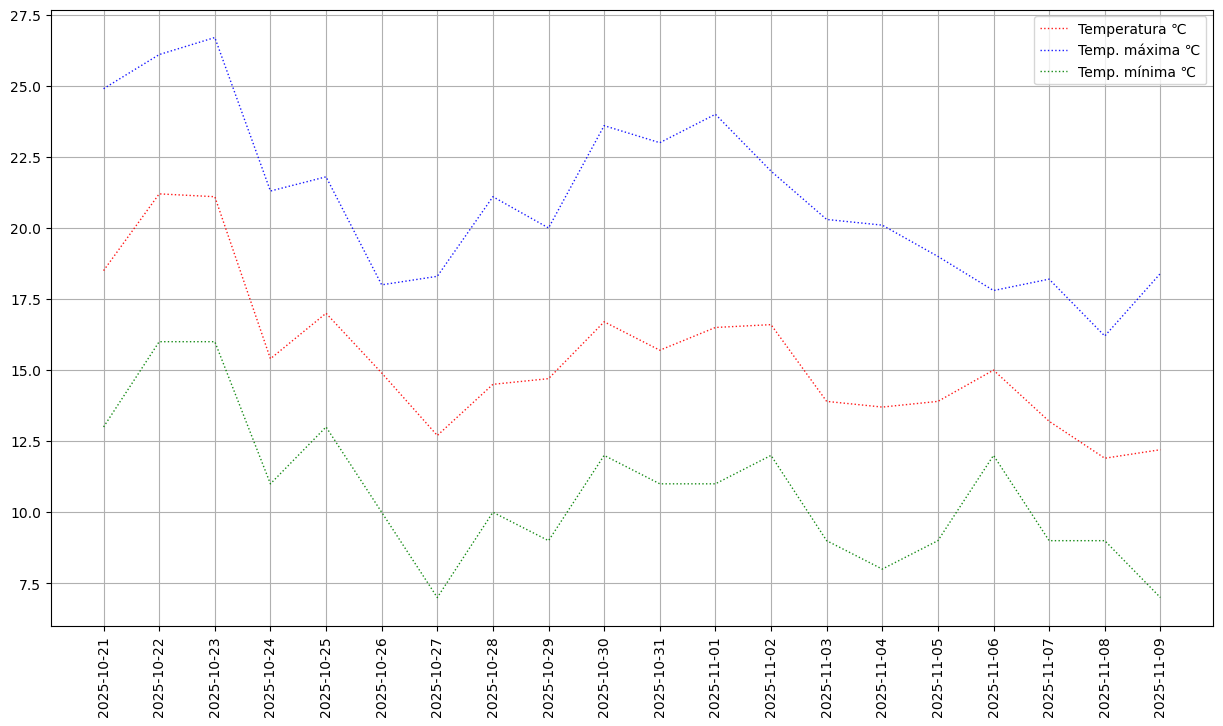

In [15]:
X = caldes_de_montbui["Fecha"]
Y1 = caldes_de_montbui["Media de la temperatura"]
Y2 = caldes_de_montbui["Temperatura máxima"]
Y3 = caldes_de_montbui["Temperatura mínima"]

colores = ["red", "blue", "green"]

plt.figure(figsize = (15, 8))

plt.plot(X,
         Y1, 
         color       = "red",
         markersize  = 3,
         linestyle   = ":",
         linewidth   = 1,
         alpha       = 0.9,
         label       = "Temperatura ℃") 

plt.plot(X,
         Y2, 
         color       = "blue",
         markersize  = 3,
         linestyle   = ":",
         linewidth   = 1,
         alpha       = 0.9,
         label       = "Temp. máxima ℃") 

plt.plot(X,
         Y3, 
         color       = "green",
         markersize  = 3,
         linestyle   = ":",
         linewidth   = 1,
         alpha       = 0.9,
         label       = "Temp. mínima ℃") 



plt.legend()
plt.xticks(rotation = 90)
plt.grid()
plt.show()